# COVID-19 World Overview
> Tracking coronavirus total cases, deaths and new cases in Sierra Leone and Africa.

- comments: true
- author: AJ
- categories: [overview, interactive]
- image: images/covid.PNG
- permalink: /covid-overview-sl-af/
- hide: false

In [1]:
#hide
import numpy as np
import pandas as pd
from jinja2 import Template
from IPython.display import HTML
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#hide
import covid_overview as covid

In [3]:
#hide
paths = {
    'mapping': 'countryContinent.csv',
    'overview': 'sl_overview.tpl'
}

def get_template(path):
    from urllib.parse import urlparse
    if bool(urlparse(path).netloc):
        from urllib.request import urlopen
        return urlopen(path).read().decode('utf8')
    return open(path).read()

def get_mappings(url):
    df = pd.read_csv(url, encoding='"ISO-8859-1"')
    return {
        'df': df,
        'replace.country': dict(df.dropna(subset=['Name']).set_index('Country')['Name']),
        'map.continent': dict(df.set_index('Name')['Continent'])
    }

In [4]:
#hide
mapping = get_mappings(paths['mapping'])

In [5]:
#hide
COL_REGION = 'Country/Region'
africa_countries = mapping['df'].pipe(lambda d: d[d['Continent'].eq('Africa')])['Name'].values
filter_africa = lambda d: d[d['Country/Region'].isin(africa_countries)]
kpis_info = [
    {'title': 'Sierra Leone', 'prefix': 'SL'},
    {'title': 'Guinea', 'prefix': 'GU'},
    {'title': 'Liberia', 'prefix': 'LI'},
    {'title': 'South Africa', 'prefix': 'SA'}]
data = covid.gen_data(region=COL_REGION, filter_frame=filter_africa, kpis_info=kpis_info)

In [6]:
#hide_input
template = Template(get_template(paths['overview']))
dt_cols, LAST_DATE_I = data['dt_cols'], data['dt_last']
html = template.render(
    D=data['summary'], table=data['table'],
    newcases=data['newcases'].loc[:, dt_cols[LAST_DATE_I - 40]:dt_cols[LAST_DATE_I]],
    COL_REGION=COL_REGION,
    KPI_CASE='Africa',
    KPIS_INFO=kpis_info,
    LEGEND_DOMAIN=[5, 50, 500, np.inf],
    np=np, pd=pd, enumerate=enumerate)
HTML(f'<div>{html}</div>')

In [7]:
#hide
df_git = pd.read_csv('covid_19_clean_complete.csv')
df_git.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


## Disease Spread in Africa

In [8]:
#hide
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Camoros',
'Democratic Republic of the Congo', 'Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius',
'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
africa[:5]

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso']

In [9]:
#hide
african = df_git[df_git['Country/Region'].isin(africa)]
african.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
24,NaN,Benin,9.3077,2.3158,1/22/20,0,0,0
31,NaN,Burkina Faso,12.2383,-1.5616,1/22/20,0,0,0
34,NaN,Cameroon,3.8480,11.5021,1/22/20,0,0,0


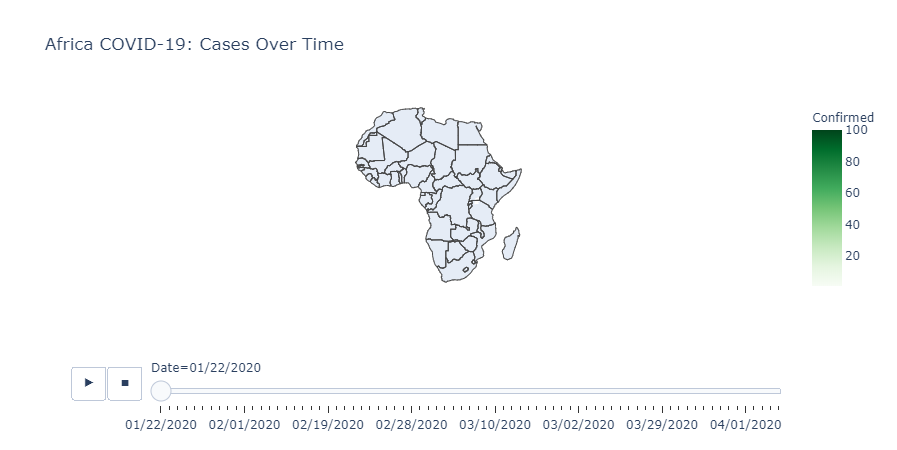

In [75]:
#hide_input
temp = african.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m/%d/%Y')
temp['size'] = temp['Confirmed'].pow(0.3) * 3.5


fig = px.scatter_geo(temp, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color=[1,100],
                     projection="equirectangular", animation_frame="Date", 
                     scope='africa',
                     title='Africa COVID-19: Cases Over Time', color_continuous_scale="greens")
fig.show()

Observations:

- At 2/23/2020, Africa reported its first case from Egypt.
- South Africa has the highest number of confirmed cases at 1380, second to Algeria
- Rapid Spread of the virus happened between the 20th March to the 1st April, 10 days, at almost 400%

In [12]:
#hide
# You need internet to scrape this data from url source
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [13]:
#hide
import numpy as np
africa_confirmed = confirmed_df[confirmed_df['Country/Region'].isin(africa)]
africa_deaths = deaths_df[deaths_df['Country/Region'].isin(africa)]
africa_recovered = recoveries_df[recoveries_df['Country/Region'].isin(africa)]

In [20]:
#hide
cols = africa_confirmed.keys()
confirmed = africa_confirmed.loc[:, cols[4]:cols[-1]]
deaths = africa_deaths.loc[:, cols[4]:cols[-1]]
recoveries = africa_recovered.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
# initialize some variables
mortality_rate = []
recovery_rate = []

In [ ]:
#hide
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

In [57]:
#hide
import math
mortality_rate = [float(0) if math.isnan(x) else x for x in mortality_rate]
recovery_rate = [float(0) if math.isnan(x) else x for x in recovery_rate]

In [60]:
#hide
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

**Recovery Rate of Covid19 by days in Africa**

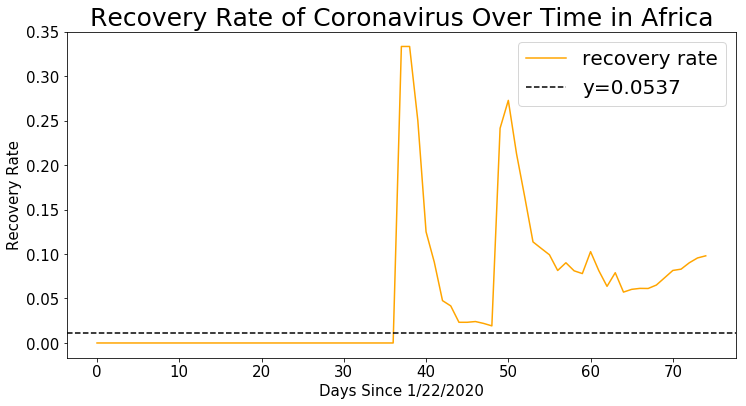

In [73]:
#hide_input
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, recovery_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time in Africa', size=25)
plt.legend(['recovery rate', 'y='+str('{0:.4f}'.format(mean_recovery_rate))], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Recovery Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

**Mortality Rate of Covid19 by days in Africa**

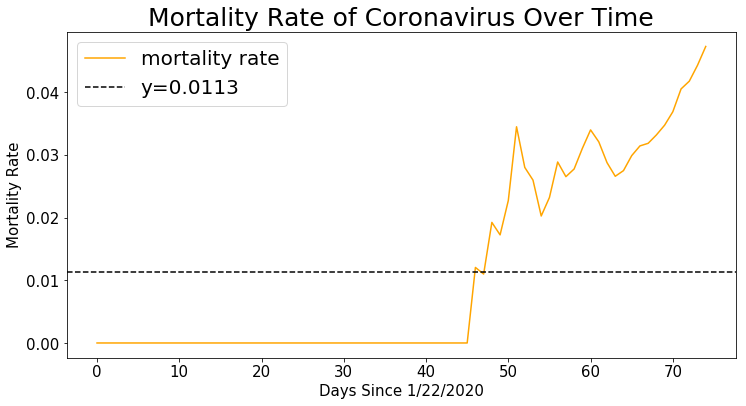

In [74]:
#hide_input
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=25)
plt.legend(['mortality rate', 'y='+str('{0:.4f}'.format(mean_mortality_rate))], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Mortality Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

[^1]: Source: ["COVID-19 Data Repository by Johns Hopkins CSSE"](https://systems.jhu.edu/research/public-health/ncov/) [GitHub repository](https://github.com/CSSEGISandData/COVID-19). Link to [notebooks](https://github.com/abdulj40/SL_Covid19_Blog/tree/master/_notebooks), [orignal interactive](https://gramener.com/enumter/covid19/europe.html)